## Practical Assignment 5.1: Will the Customer Accept the Coupon?

**Objective**
The objective for this practical assignment is to analyze the dataset provided in order to come to conclusions as to what kind of customers accept targeted coupons and what are the conditions in which they do so. The end goal is to build the skills and thought process in which machine learning models and AI could be trained in order to enhance coupon acceptance rates and customer targeting, though at this stage and for this assignment, it is not considered. 

Additionally, part of the exercise is to practice and evaluate the ability to clean and process data sets in order to obtain clear and actionable insights from it.

**Dataset**
The dataset, titled `coupons.csv`, has been provided by Emeritus and UC Berkeley as a CSV which has been downloaded locally and worked on. The dataset itself has not been modified, only adjusted within this notebook.

**Notebook**
This notebook, `Practical_Assignment_5.1_Jonathan_O'Dea.ipynb`,contains the following section:
- Project prompt
1. Data Loading and Review
2. Data Preparation
3. Initial Data Review and Observations
4. Investigating the Bar Coupons
5. Independent Investigation
6. Findings and Conclusion

### Summary of Findings

Through this analysis it was evident to see some reocurring trends in coupon acceptance rates which could help in future offer predictions and modelling. Across all coupon categories, the overall acceptance rate was 56.8%. Bar coupons were less frequently accepted overall (41%), yet showed the strongest response among drivers under 30 and those who visit bars more than once per month, with acceptance rates of roughly 70%, compared with ~30% for infrequent visitors.

Additional behavioral and demographic patterns included:

- Timing: Most accepted coupons were used within a one-day expiration window and outside home/work trips, indicating more planned decisions rather than impulsive ones.
- Demographics: Acceptance was highest among younger drivers, particularly those who were single or married with a partner.
- Income: While acceptance spans all income brackets, there is a slight skew toward lower to middle incomes, aligning with the younger demographic most responsive to Bar coupons.

**Actionable ideas**

- Target drivers by habit and timing: Focusing on drivers with over two visits a month.
- Perform testing on coupon expiry: Perform A/B testing on coupon acceptance using the 1 day expiration as a base.
- Target timing with venues/ coupons: Bars for after office hours, mornings for coffee, etc.
- Amplify time windows and offers: Targeting for less frequent coupon users.
- Bundle coupons: See if combining or bundling coupons in various categories for bigger rewards can be achieved.

### How to Run

1. The public project repository can be located at: https://github.com/Jonny802/Practical-Application-Assignment-5.1
2. Download the project file `Practical_Assignment_5.1_Jonathan_O'Dea.ipynb` and `coupons.csv` csv locally
3. The dataet should be located in /data locally
4. Run cells top-to-bottom.

---

### Project Prompt

Sourced from the original prompt.ipynb file.

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

---


In [210]:
# --------------------------------------------
# Imports and layout
# --------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Enable all columns visible
pd.set_option('display.max_columns', None)

---

## 1. Data Loading and Review
- Read in the provided coupons.csv file

In [211]:
#--------------------------------------------
# Load data from CSV
#--------------------------------------------
data = pd.read_csv('coupons.csv')

**Data Description**

Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

**Assignment Approach**

Analysis should be focused on trying to compare the accepted coupons vs non-redeemed coupons to analyse what worked, versus what didn't.

By trying to get a snapshot of the conditions and motives behind acceptance criteria of a coupon, strategies can be implemented to shape models into predicting more effective and targeted ways in which to convey coupon offers, into coupon usage.

In [212]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

---

## 2. Data Preparation
Investigating the dataset for missing or problematic data.

In [214]:
# Look for missing values:
missing = data.isnull().sum()
missing

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**Data Cleaning:** 

After investigating the data for missing values or conflicting elements, a series of steps were taken to clean up the data to assist with the analysis of its contents.

In [215]:
# --------------------------------------------
# Basic cleaning and filtering
# --------------------------------------------

# In this cell is a complation of edits to the data to make it more usable:

# Remove the 'car' column completely. 98% of values missing and doesn't provide valued insights.
data = data.drop('car', axis=1, errors='ignore')

# Replace NaN values in the restaurant type columns with 'Never'. Make up a small portion of the data and it is assumed that "NaN" refers to 
# "does not visit"
cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[cols_to_fill] = data[cols_to_fill].fillna('never')

# Clean up "visits" to numerical averages to make it easier to analyze (avoids making lists, too):
data = data.replace({'never': 0,'less1': 0,'1~3': 2,'4~8': 6,'gt8': 8})
data = data.infer_objects(copy=False)  # as per Future Warning message 

# Fix 'age' column as 'below21' and '50plus' affecting counts:
# 20 now refers to 'below21' and 50 refers to '50plus'
data['age'] = data['age'].replace({'below21': 20,'50plus': 50})
data['age'] = pd.to_numeric(data['age'])

# Make two new columns for upper and lower income ranges:
data['income_lower'] = (((data['income'].str.split(pat=' ')).apply(lambda x: x[0])).str.split(pat='$')).apply(lambda x: x[-1])
data['income_upper'] = (((data['income'].str.split(pat=' ')).apply(lambda x: x[-1])).str.split(pat='$')).apply(lambda x: x[-1])

# Remove "Less" and "More" limits, and replace them with 0 and 125000, respectively:
data['income_lower'] = data['income_lower'].replace({'Less': 0})
data['income_upper'] = data['income_upper'].replace({'More': 125000})
data['income_lower'] = pd.to_numeric(data['income_lower'])
data['income_upper'] = pd.to_numeric(data['income_upper'])

C:\Users\Jonny\AppData\Local\Temp\ipykernel_25968\2791172287.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'never': 0,'less1': 0,'1~3': 2,'4~8': 6,'gt8': 8})


In [216]:
# Check new cleaned data for missing values:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
income_lower            0
income_upper            0
dtype: int64

---

## 3. Initial Data Review and Observations
What proportion of the total observations chose to accept the coupon?

  Coupon_Used  proportion
0          No    0.431567
1         Yes    0.568433


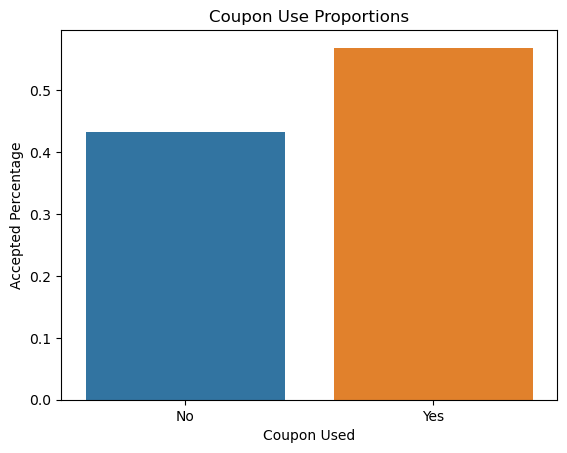

In [217]:
# Total accepted coupon acceptance rate
# Replacing 1/0 with yes/no to assist for visual aspect as well as data management:

data['Coupon_Used'] = data['Y'].replace({1: 'Yes', 0: 'No'})
acceptance_rate = data['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Plot to see used coupons vs accepted percentage:
sns.barplot(data=acceptance_rate, x='Coupon_Used', y='proportion', hue='Coupon_Used')
plt.xlabel('Coupon Used')
plt.ylabel('Accepted Percentage')
plt.title('Coupon Use Proportions')
print(acceptance_rate)
plt.show()

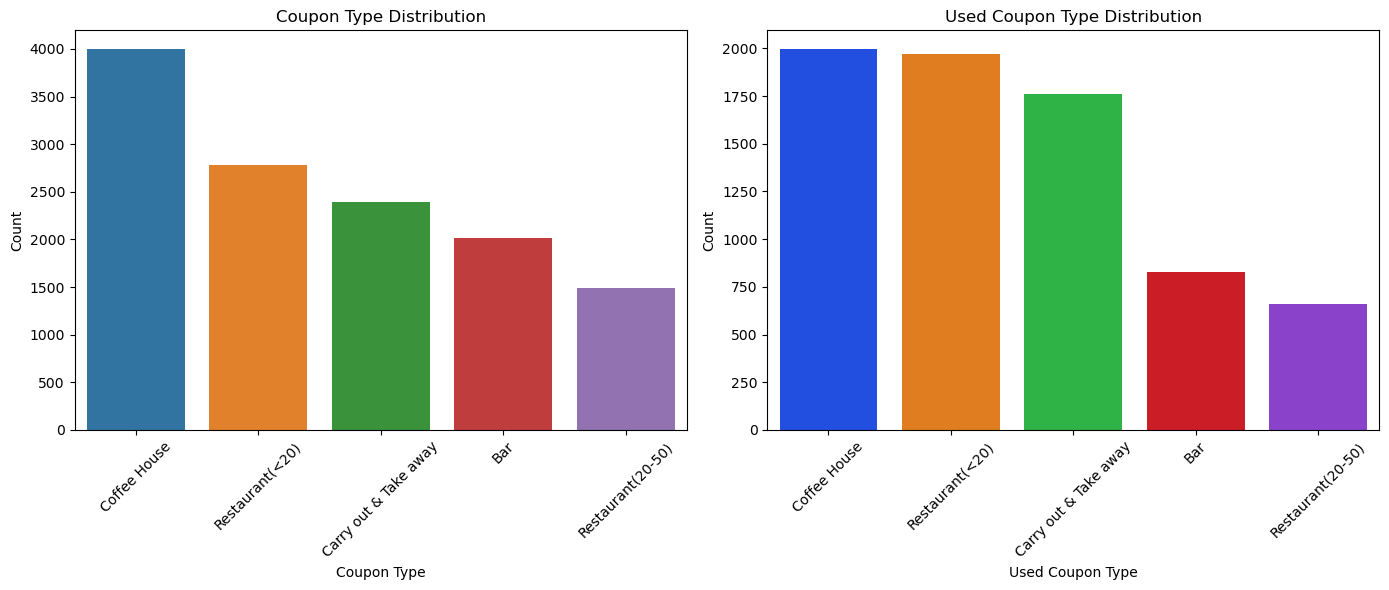

In [218]:
# Set up so that plots can be one next to the other:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Total coupon offers and types:

# DataFrame that gets value counts from different coupon types in 'coupon' column.
coupon_type = data['coupon'].value_counts().reset_index()

# Plot total coupon offers per category:
sns.barplot(ax = axes[0], data = coupon_type, x = 'coupon', y = 'count', hue = 'coupon')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('Coupon Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Coupon Type Distribution')

# Used coupon types:

# DataFrame that selects only rows in which "Y" is 1 - i.e. used coupons
filtered_coupon_type = data[data['Y'] == 1]

# DataFrame that gets value counts from different coupon types in 'coupon' column from those who used the coupons.
used_coupon_type = filtered_coupon_type['coupon'].value_counts().reset_index()

# Plot total accepted or used coupons per category:
sns.barplot(ax = axes[1], data = used_coupon_type, x = 'coupon', y = 'count', hue = 'coupon', palette = 'bright')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Used Coupon Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Used Coupon Type Distribution')

plt.tight_layout()
plt.show()

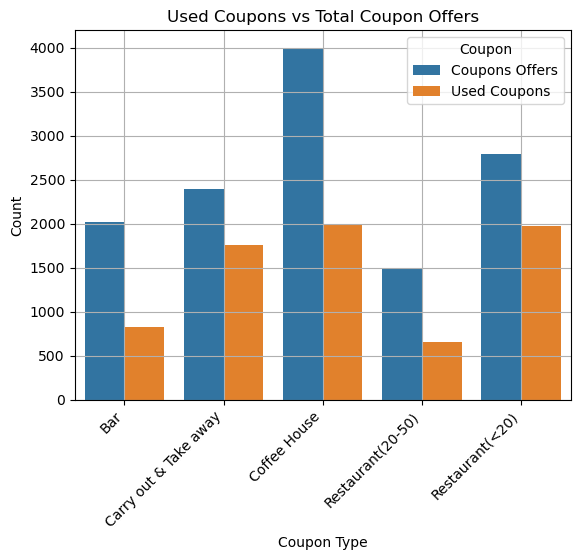

In [219]:
# Plot the two previous plots on the same graph to visually compare offers available and acceptance/ usage by category.

# Repeating the same filters as above:
coupon_type = data['coupon'].value_counts().sort_index().reset_index()
filtered_coupon_type = data[data['Y'] == 1]
used_coupon_type = filtered_coupon_type['coupon'].value_counts().sort_index().reset_index()

# Adding new column 'Coupon' to both new DataFrames to identify accepted/ used coupons vs total.
coupon_type['Coupon'] = 'Coupons Offers'
used_coupon_type['Coupon'] = 'Used Coupons'

# Combine the two DataFrames.
combined = pd.concat([coupon_type, used_coupon_type])

# Plot used coupons vs total coupon offers, separated by type category:
sns.barplot(data=combined, x='coupon', y='count', hue='Coupon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Used Coupons vs Total Coupon Offers')
plt.grid(True)
plt.show()

**Additional observations of the data in general:**

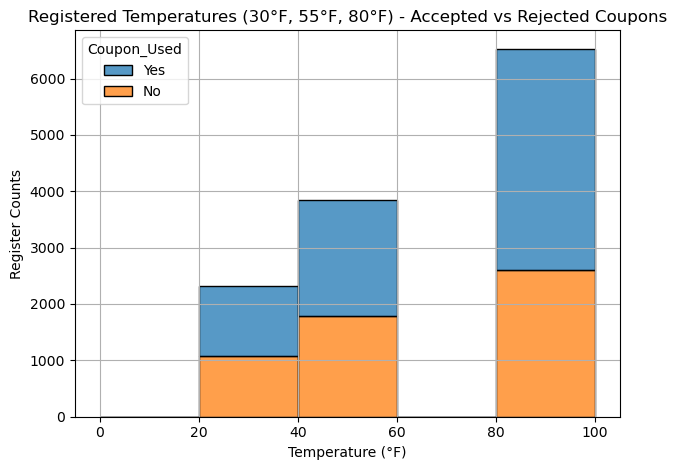

In [220]:
# Plot simple histogram of temperature options for the survey.
sns.histplot(data, x = 'temperature', bins=range(0, 101, 20), hue = 'Coupon_Used', multiple= 'stack', edgecolor='black',)
plt.xlabel('Temperature (°F)')
plt.ylabel('Register Counts')
plt.title('Registered Temperatures (30°F, 55°F, 80°F) - Accepted vs Rejected Coupons')
plt.grid(True)
plt.tight_layout()
plt.show()

**Findings based on initial analysis:**

Upon reviewing the initial filters and conditions of the data set it can be seen that overall coupon acceptance is 56.8% across the five coupon categories, . 


Factors such as temperature showed a linear trend, however hotter weather did not guarantee a coupon use, which means it may not be a solid considering factor. 

Further investigation will need to take place to determine a customer’s likelihood to accept or use a coupon.




---

## 4. Investigating the Bar Coupons

Based on the initial findings, a good point to start could be analyzing a particular coupon; in this case, the "Bar" coupon.

Understanding the customer's patterns and demographics could help show factors into what results in the usage of a coupon, and what doesn't.

Elements to consider in the following section are:

- Habitual visit/ purchase frequency
- Age
- Passengers - who are they with?
- Income
- Occupation
- Marital status

In [221]:
# --------------------------------------------
# Focusing on only "bar" coupons and their acceptance patterns
# --------------------------------------------

# New DataFrame that contains just the bar coupons
bar_coupon_data = data[data['coupon'] == "Bar"]
bar_coupon_data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_lower,income_upper,Coupon_Used
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,0,6,2,1,1,0,0,1,0,37500,49999,No
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,0,6,2,1,0,0,1,0,1,37500,49999,Yes
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,0,6,2,1,1,1,0,1,0,37500,49999,No
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,0,0,6,6,0,1,0,0,0,1,1,62500,74999,Yes
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,0,0,6,6,0,1,0,0,1,0,1,62500,74999,Yes


  Coupon_Used  proportion
0          No    0.589985
1         Yes    0.410015


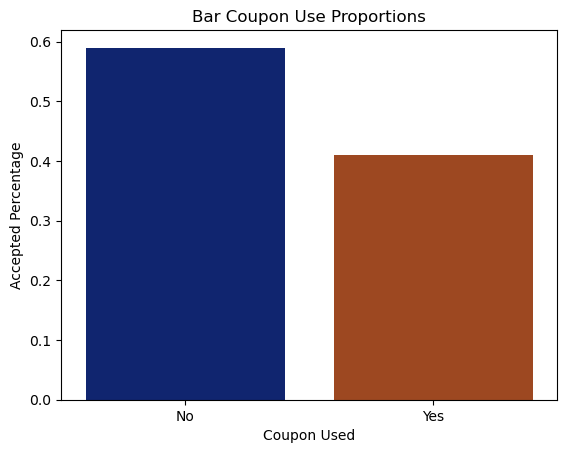

In [222]:
# --------------------------------------------
# Focusing on only "bar" coupons and their acceptance patterns  -- What proportion of bar coupons were accepted?
# --------------------------------------------

# Acceptance rates for bar coupons:
bar_proportion = bar_coupon_data['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Plot of overall bar acceptance rate:
sns.barplot(data=bar_proportion, x='Coupon_Used', y='proportion', hue='Coupon_Used', palette = 'dark')
plt.xlabel('Coupon Used')
plt.ylabel('Accepted Percentage')
plt.title('Bar Coupon Use Proportions')
print(bar_proportion)
plt.show()

In [223]:
# --------------------------------------------
# Create a DF for only "bar" coupons that were accepted or used 
# --------------------------------------------
accepted_bar_coupon = data[(data['Y'] == 1) & (data['coupon'] == 'Bar')]

# Quick count checks to get an understanding of the trends

# Time frame for bar coupons used:
bar_time = accepted_bar_coupon['expiration'].value_counts().sort_values(ascending = False)
# Destination when bar coupons used or accepted (detail unknown)
bar_destination = accepted_bar_coupon['destination'].value_counts().sort_values(ascending = False)
# Ages of acceptance/ usage
bar_age = accepted_bar_coupon['age'].value_counts().sort_values(ascending = False)
# Marital Status for those who used bar coupons:
bar_maritalStatus = accepted_bar_coupon['maritalStatus'].value_counts().sort_values(ascending = False)
# Incomes for those who used bar coupons:
bar_income = accepted_bar_coupon['income'].value_counts().sort_values(ascending = False)

print(bar_time)
print(' ')
print(bar_destination)
print(' ')
print(bar_age)
print(' ')
print(bar_maritalStatus)
print(' ')
print(bar_income)

expiration
1d    641
2h    186
Name: count, dtype: int64
 
destination
No Urgent Place    418
Home               231
Work               178
Name: count, dtype: int64
 
age
21    211
26    193
31    125
50     84
41     77
36     63
46     38
20     36
Name: count, dtype: int64
 
maritalStatus
Single               361
Married partner      290
Unmarried partner    151
Divorced              18
Widowed                7
Name: count, dtype: int64
 
income
$25000 - $37499     143
$100000 or More     138
$12500 - $24999     120
$50000 - $62499     108
$37500 - $49999      93
Less than $12500     76
$75000 - $87499      57
$62500 - $74999      46
$87500 - $99999      46
Name: count, dtype: int64


---
**4.1 - Comparing trends under a number of scenarios to identify user patterns and acceptance conditions.**

---
Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [224]:
# Subsets to filter lists witin 'Bar' column
subset_1 = bar_coupon_data.query('Bar <= 3')
subset_2 = bar_coupon_data.query('Bar > 3')

# Get proportions
less_3_bar_proportion = subset_1['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
over_three_proportion = subset_2['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Print results
print('Acceptance rate for those who go to bars three or fewer times a month:')
print('')
print(less_3_bar_proportion)
print('')
print('Acceptance rate for those who go to bars over three times a month:')
print('')
print(over_three_proportion)

Acceptance rate for those who go to bars three or fewer times a month:

  Coupon_Used  proportion
0          No    0.629263
1         Yes    0.370737

Acceptance rate for those who go to bars over three times a month:

  Coupon_Used  proportion
0          No    0.231156
1         Yes    0.768844


---
**4.2 - Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?**

---

In [225]:
# Subsets to filter lists witin 'Bar' column
subset_3 = bar_coupon_data.query('(Bar > 1) and (age > 25)')
subset_4 = bar_coupon_data.query('(Bar <= 1) or (age <= 25)')

# Get acceptance rates
over_one_visit_over_25_acceptance_rate = subset_3['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
less_or_one_visit_OR_under_25_acceptance_rate = subset_4['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Print results
print('Almost opposite results, though those who who go more than once a month and are over 25 years old are doubly likely to accept the coupon')
print('')
print('More than once visit to the bar a month, over 25 y/o:')
print('')
print(over_one_visit_over_25_acceptance_rate)
print('')
print('All others (One or less visits to the bar a month, OR under 25 y/o):')
print('')
print(less_or_one_visit_OR_under_25_acceptance_rate)

Almost opposite results, though those who who go more than once a month and are over 25 years old are doubly likely to accept the coupon

More than once visit to the bar a month, over 25 y/o:

  Coupon_Used  proportion
0          No    0.304762
1         Yes    0.695238

All others (One or less visits to the bar a month, OR under 25 y/o):

  Coupon_Used  proportion
0          No    0.664997
1         Yes    0.335003


---
**4.3 - Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**

---

In [226]:
# Create lists for occupation and passengers
occupation_list = ['Farming Fishing & Forestry']  # Selected occupation
passenger_list =['Friend(s)', 'Partner']  # Adults, not alone

# Subsets to filter lists witin 'Bar' column
subset_5 = bar_coupon_data.query('(Bar > 1) and (occupation not in @occupation_list) and (passanger in @passenger_list)')
subset_6 = bar_coupon_data.query('(Bar <= 1) or (occupation in @occupation_list) or (passanger not in @passenger_list)')

# Get acceptance rates
over_one_visit_not_FFF_adult_passenger = subset_5['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
less_or_one_visit_OR_in_FFF_OR_alone_or_kids = subset_6['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Print results
print('Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:')
print('')
print(over_one_visit_not_FFF_adult_passenger)
print('')
print('Acceptance rate between drivers who go to bars one or less times a month OR was alone or had passengers that was a kid OR worked in farming, fishing, or forestry:')
print('')
print(less_or_one_visit_OR_in_FFF_OR_alone_or_kids)

print('')

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:

  Coupon_Used  proportion
0          No    0.282051
1         Yes    0.717949

Acceptance rate between drivers who go to bars one or less times a month OR was alone or had passengers that was a kid OR worked in farming, fishing, or forestry:

  Coupon_Used  proportion
0          No    0.622942
1         Yes    0.377058



---
**4.4 - Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

---

In [227]:
# Create lists for conditions:
occupation_list = ['Farming Fishing & Forestry']
passenger_list =['Friend(s)', 'Partner']
frequent_cheap_rest = ['4~8', 'gt8']

# Subsets to filter lists witin 'Bar' column
subset_7 = bar_coupon_data.query('(Bar > 1) and (passenger in @passenger_list) and (maritalStatus != "Widowed")')
subset_8 = bar_coupon_data.query('(Bar > 1) and (age < 30)')
subset_9 = bar_coupon_data.query('(RestaurantLessThan20 > 4) and (income_upper < 50000) and (income_lower < 50000)')

# Get acceptance rates
over_one_visit_adult_passenger_not_widowed = subset_7['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
over_one_visit_under_30 = subset_8['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
frequent_cheap_rest_income_under_50K = subset_9['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Print results
print('Almost opposite results, though those who who go more than once a month and are over 25 years old are ~2x more likely to accept the coupon')
print('')
print('Go to bars more than once a month, had passengers that were not a kid, and were not widowed:')
print('')
print(over_one_visit_adult_passenger_not_widowed)
print('')
print('Go to bars more than once a month and are under the age of 30:')
print('')
print(over_one_visit_under_30) 
print('')
print('Go to cheap restaurants more than 4 times a month and income is less than 50K:')
print('')
print(frequent_cheap_rest_income_under_50K) 

UndefinedVariableError: name 'passenger' is not defined

---

**4.5 - Collection of plots from "Bar Coupon" analysis**

---

In [ ]:
# --------------------------------------------
# Collection of plots
# --------------------------------------------

# Plots are set up so that plots can be one next to the other as per analysis above.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 1 row, 3 columns

# --------------------------------------------

# Group 4_1/ Plot 1: Comparison of acceptance rates based how many visits to the bar a month
# Create tables and combine:
over_three_proportion['Group_4_1'] = '3 < visit/mo'
less_3_bar_proportion['Group_4_1'] = '3 => visit/mo'
# Combine DataFrames
combined_1 = pd.concat([less_3_bar_proportion, over_three_proportion])
# Plot used coupons vs total coupon offers, separated by type category:
sns.barplot(ax = axes[0,0], data=combined_1, x='Group_4_1', y='proportion', hue='Coupon_Used')
axes[0,0].set_ylabel('Acceptance Rate')
axes[0,0].set_title('Acceptance Rate by Bar Visit Frequency')

# --------------------------------------------

# Group 2/ Plot 2: Comparison of acceptance rates based on visit frequency and age
# Create tables and combine:
over_one_visit_over_25_acceptance_rate['Group_4_2'] = 'Over 25 & >1 visit/mo'
less_or_one_visit_OR_under_25_acceptance_rate['Group_4_2'] = '≤1 visit/mo or ≤25 y/o'
# Combine DataFrames
combined_2 = pd.concat([over_one_visit_over_25_acceptance_rate, less_or_one_visit_OR_under_25_acceptance_rate])
# Plot used coupons vs total coupon offers, separated by type category:
sns.barplot(ax = axes[0,1], data=combined_2, x='Group_4_2', y='proportion', hue='Coupon_Used', palette = 'Set1')
axes[0,1].set_ylabel('Acceptance Rate')
axes[0,1].set_title('Acceptance Rate by Visit Frequency and Age')

# --------------------------------------------

# Group 3/ Plot 3: Comparison of acceptance rates based on visit frequency, type of passenger and specific occupation
# Create tables and combine:
over_one_visit_not_FFF_adult_passenger['Group_4_3'] = '1+ visit/mo & Not FFF & adult pax'
less_or_one_visit_OR_in_FFF_OR_alone_or_kids['Group_4_3'] = '≤1 visit/mo or work FFF or alone/w/kids'
# Combine DataFrames
combined_3 = pd.concat([over_one_visit_not_FFF_adult_passenger, less_or_one_visit_OR_in_FFF_OR_alone_or_kids])
# Plot used coupons vs total coupon offers, separated by type category:
sns.barplot(ax = axes[1,0], data=combined_3, x='Group_4_3', y='proportion', hue='Coupon_Used', palette = 'Set2')
axes[1,0].set_ylabel('Acceptance Rate')
axes[1,0].set_title('Acceptance Rate by Visit Frequency, Passenger, and Occupation')

# --------------------------------------------

#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
#go to bars more than once a month and are under the age of 30 OR
#go to cheap restaurants more than 4 times a month and income is less than 50K.

# Group 4/ Plot 4: Three-way comparison of acceptance rates based on three individual sets of criteria
# Create tables and combine:
over_one_visit_adult_passenger_not_widowed ['Group_4_4'] = '1+ /mo & adult pax & not widowed'
over_one_visit_under_30['Group_4_4'] = '1+ /mo & <30 y/o'
frequent_cheap_rest_income_under_50K['Group_4_4'] = 'Cheap rest >4/mo & income <50K'
# Combine DataFrames
combined_4 = pd.concat([over_one_visit_adult_passenger_not_widowed, over_one_visit_under_30, frequent_cheap_rest_income_under_50K])
# Plot used coupons vs total coupon offers, separated by type category:
sns.barplot(ax = axes[1,1], data=combined_4, x='Group_4_4', y='proportion', hue='Coupon_Used', palette = 'Set3')
axes[1,1].set_ylabel('Acceptance Rate')
axes[1,1].set_title('Acceptance Rate under Three Criteria (Bar coupons)')


plt.tight_layout()
plt.show()

In [ ]:
# Subsets to filter lists witin 'Bar' column
subset_1 = bar_coupon_data.query('Bar <= 3')
subset_2 = bar_coupon_data.query('Bar > 3')

# Get proportions
less_3_bar_proportion = subset_1['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
over_three_proportion = subset_2['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Print results
print('Acceptance rate for those who go to bars three or fewer times a month:')
print('')
print(less_3_bar_proportion)
print('')
print('Acceptance rate for those who go to bars over three times a month:')
print('')
print(over_three_proportion)

---
**Findings from analysis:**

**Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**


Overall coupon acceptance across all categories was at **56.8%**. Bar coupon acceptance rate was at **41%** overall, with the highest acceptance rates among drivers under 30 and those visiting bars more than once per month (**~70%**), compared with **~30%** of driver acceptance for infrequent visitors.

From counts of used bar coupons from individual criteria, such as coupon expiration, age of person, destination, etc. it can be concluded that those more likely to accept and use a bar coupon who fall under the following criteria:

- The majority are being used within the one day timeframe and when their destination is not going home or to work, less spur of the moment.
- They are most likely to be single, or married with a partner and under the age of 30.
- The acceptance rate of bar coupons spans over all income brackets, however there is a mild skew to the lower to middle income brackets, which also supports the primary age range for bar coupon acceptance.
 

---

## 5. Independent Investigation

**Using the bar coupon example as a basis, another coupon group is to be observed to try to determine the characteristics of passengers who accept the coupons.**

The initial data review showed a fairly even split between in coupon usage, then looking briefly into coupon acceptance and driver trends for the "bar" coupons, I would like to delve into the "coffee house" coupons.

The coffee house coupons also have a split acceptance rate, which is interesting given it is a more "accessible" product in that there are no age restrictions, does not require table service and is limited to time restrictions. It also has the largest amount of coupon offers by a good margin. Gaining insight as to why the acceptance rate is not higher will be the objective of this investigation.

**Information and data gathering regarding overall acceptance rates and habits or factors:**

In [ ]:
coupon_type = data['coupon'].value_counts().reset_index()
used_coupons = data[data['Y'] == 1]
used_coupon_type = used_coupons['coupon'].value_counts().reset_index().sort_index(ascending = True)
print(used_coupon_type)

In [ ]:
# Determine what occupations are more likely to use a coupon:

sns.countplot(data = used_coupons, x = 'occupation', order=used_coupons['occupation'].value_counts().index, hue = 'occupation')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Occupation')
plt.ylabel('Coupon Usage Count')
plt.title('Coupon Acceptance Rate By Occupation')
plt.tight_layout()
plt.show()

In [ ]:
# Determine if age in general has a relation to coupon acceptance:

age_review = used_coupons['age'].value_counts().sort_index()
#age_review
sns.countplot(data = used_coupons, x = 'age', hue = 'age')
plt.xlabel('Age')
plt.ylabel('Coupon Usage Count')
plt.title('Coupon Acceptance Rate By Age')
plt.tight_layout()
plt.show()

In [ ]:
# Plot salary vs coupon acceptance:
filtered_coupon_type = data[data['Y'] == 1]
upper_income_review = filtered_coupon_type[['income_upper']].value_counts().sort_values(ascending = False).reset_index()
sns.barplot(upper_income_review, x='income_upper', y = 'count', color = 'green')
plt.xlabel('Income (upper range)')
plt.ylabel('Coupon Usage Count')
plt.title('Coupon Acceptance Rate By Income')
plt.tight_layout()
plt.show()

As mentioned in section 4, it is noticeable a left skew towards lesser income drivers accepting coupons.

In [ ]:
# Analyze correlations across entire dataset, not only the filtered data with accepted coupons: 

numeric_df = data.select_dtypes(include = 'number')
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]   # Removed "toCoupon_GEQ5min" as provided no valueable insight with majority "0" values
corr = numeric_df.corr().fillna(0)
plt.figure(figsize=(18, 8))
sns.heatmap(data = numeric_df.corr(), annot = True, cmap = 'magma')
plt.title('Used Coupons Correlation Heatmap')
plt.show()

The correlations in the heatmap of the general dataset are rather weak, indicating many indicating factors as to coupon acceptance.

What can be noted is a moderate positive correlation (0.15 - 0.4) of those who are more likely to use coupons in one category, are also likely to use them for other categories.

**Focusing on Coffee House specific coupons:**

In [ ]:
coffee_coupon_data = data[data['coupon'] == "Coffee House"]
coffee_acceptance = coffee_coupon_data['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
coffee_acceptance

In [ ]:
# Same as the Bar review, What is the acceptance rate based on monthly visit frequency:
# One or fewer vs. more than one, and three or fewer vs. more than three

# Subsets to filter lists witin 'Bar' column
subset_5_1 = coffee_coupon_data.query('CoffeeHouse <= 1')
subset_5_2 = coffee_coupon_data.query('CoffeeHouse > 1')
subset_5_3 = coffee_coupon_data.query('CoffeeHouse <= 3')
subset_5_4 = coffee_coupon_data.query('CoffeeHouse > 3')

# Get proportions
less_1_coffee = subset_5_1['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
over_1_coffee = subset_5_2['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
less_3_coffee = subset_5_3['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()
over_3_coffee = subset_5_4['Coupon_Used'].value_counts(normalize=True).sort_index().reset_index()

# Print results
print('Acceptance rate for those who get coffee one or fewer times a month:')
print('')
print(less_1_coffee)
print('')
print('Acceptance rate for those who go get coffee over once a month:')
print('')
print(over_1_coffee)
print('')
print('Acceptance rate for those who get coffee three or fewer times a month:')
print('')
print(less_3_coffee)
print('')
print('Acceptance rate for those who go get coffee over three times a month:')
print('')
print(over_3_coffee)


In [ ]:

# Plot above results:
# Set up so that plots can be one next to the other:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Group 5_1/ Plot 1: Comparison of acceptance rates based how many visits a month (base 1):
# Create tables and combine:
less_1_coffee['Group_5_1'] = '≤1 visit/mo'
over_1_coffee['Group_5_1'] = '>1 visit/mo'
# Combine DataFrames
combined_5_1 = pd.concat([less_1_coffee, over_1_coffee])
# Plot used coupons acceptance per monthly visit (base 1):
sns.barplot(ax = axes[0], data=combined_5_1, x='Group_5_1', y='proportion', hue='Coupon_Used', palette = 'muted')
axes[0].set_ylabel('Acceptance Rate')
axes[0].set_title('Acceptance Rate by Coffee Visit Frequency (base 1 /mo)')

# Group 5_2/ Plot 2: Comparison of acceptance rates based how many visits a month (base 3):
# Create tables and combine:
less_3_coffee['Group_5_2'] = '≤3 visit/mo'
over_3_coffee['Group_5_2'] = '>3 visit/mo'
# Combine DataFrames
combined_5_2 = pd.concat([less_3_coffee, over_3_coffee])
# Plot used coupons acceptance per monthly visit (base 3):
sns.barplot(ax = axes[1], data=combined_5_2, x='Group_5_2', y='proportion', hue='Coupon_Used', palette = 'mako')
axes[1].set_ylabel('Acceptance Rate')
axes[1].set_title('Acceptance Rate by Coffee Visit Frequency (base 3/mo)')

plt.tight_layout()
plt.show()

In [ ]:
# Made a DF that has only accepted coffee coupons:
accepted_coffee_coupon = data[(data['Y'] == 1) & (data['coupon'] == 'Coffee House')]
accepted_coffee_coupon.head()

In [ ]:
# Determine what occupations are more likely to use a coupon and those who are least likely:
# count occupation only:
coffee_occupation_count = accepted_coffee_coupon['occupation'].value_counts()
coffee_occupation_count.head(6)

In [ ]:
top_6 = [['Student', 'Unemployed', 'Computer & Mathematical', 'Sales & Related', 'Management', 'Education&Training&Library']]
bottom_6 = [['Installation Maintenance & Repair', 'Personal Care & Service', 'Construction & Extraction', 'Production Occupations', 'Building & Grounds Cleaning & Maintenance' , 'Farming Fishing & Forestry']]

In [ ]:
# Plot top 6 and bottom 6:
# Set up so that plots can be one next to the other:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # 1 row, 2 columns

# Plot top 6
sns.countplot(ax = axes[0], data=accepted_coffee_coupon[accepted_coffee_coupon['occupation'].isin(top_6[0])], x='occupation', order=top_6[0], hue = 'occupation')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Coupon Usage Count')
axes[0].set_title('Top 6 Coffee Coupon acceptance')

# Plot bottom 6
sns.countplot(ax = axes[1], data=accepted_coffee_coupon[accepted_coffee_coupon['occupation'].isin(bottom_6[0])], x='occupation', order=bottom_6[0], hue = 'occupation')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Coupon Usage Count')
axes[1].set_title('Bottom 6 Coffee Coupon acceptance')

plt.tight_layout()
plt.show()

In [ ]:
# Quick count checks to get an understanding of the trends

# Time frame for coffee coupons used:
coffee_time = accepted_coffee_coupon['expiration'].value_counts().sort_values(ascending = False)
# Destination when coffee coupons used or accepted (detail unknown)
coffee_destination = accepted_coffee_coupon['destination'].value_counts().sort_values(ascending = False)
# Ages of acceptance/ usage
coffee_age = accepted_coffee_coupon['age'].value_counts().sort_values(ascending = False)
# Marital Status for those who used coffee coupons:
coffee_maritalStatus = accepted_coffee_coupon['maritalStatus'].value_counts().sort_values(ascending = False)
# Incomes for those who used coffee coupons:
coffee_income = accepted_coffee_coupon['income'].value_counts().sort_values(ascending = False)

print(coffee_time)
print(' ')
print(coffee_destination)
print(' ')
print(coffee_age)
print(' ')
print(coffee_maritalStatus)
print(' ')
print(coffee_income)

In [ ]:
# Do a comparison as to why perhaps the coupons were rejected:

# Made a DF that has only REJECTED coffee coupons:
rejected_coffee_coupon = data[(data['Y'] == 0) & (data['coupon'] == 'Coffee House')]

# Time frame for rejected coffee coupons:
reg_coffee_time = rejected_coffee_coupon['expiration'].value_counts().sort_values(ascending = False)
# Destination when rejected coffee coupons (detail unknown)
reg_coffee_destination = rejected_coffee_coupon['destination'].value_counts().sort_values(ascending = False)
# Ages of rejection 
reg_coffee_age = rejected_coffee_coupon['age'].value_counts().sort_values(ascending = False)
# Marital Status for those who used rejected coffee coupons:
reg_coffee_maritalStatus = rejected_coffee_coupon['maritalStatus'].value_counts().sort_values(ascending = False)
# Incomes for those who rejected coffee coupons:
reg_coffee_income = rejected_coffee_coupon['income'].value_counts().sort_values(ascending = False)

print(reg_coffee_time)
print(' ')
print(reg_coffee_destination)
print(' ')
print(reg_coffee_age)
print(' ')
print(reg_coffee_maritalStatus)
print(' ')
print(reg_coffee_income)

---
**Coffee House Coupon Findings:**

---

Coffee seems situational, as it is something that is perhaps more aligned with office work or sitting down at a desk, availability and store locations perhaps are a factor, though in theory, this is supposed to target drivers who are in the vicinity to use these coupons.

The acceptance of coffee coupons seems situational, and favours occupations that accepted the coupons had more traditional "desk work". Those who least accepted the coupons were from more labour intensive sectors.

As per the "bar" analysis, younger, single or married couples and slightly lower income drivers were the biggest users of the coupons.

Comparing against those who did no accept the coupons, almost all factors, age, marital status, income, time to coupon expiration etc was fairly slpit. However, more two hour coupons were rejected than one day expiration offers, indicating that a larger window of time could translate to a higher acceptance rate.

---

## 6. Findings and Conclusion

Through the analysis of Coffee House coupons, it is evident that all coupon categories share similar attributes in their acceptance criteria, being occupation, age (under 30), single people or married couples, and visit frequencies. The expiration time of the coupon did play a part, as it was more favoured in general to accept the one day coupon.

As it was in the coffee analysis, in general coupon acceptance, the top occupations that accepted the coupons were more traditional "desk work" industries. The same is true about the more labour intensive sectors.

Income was more balanced, however it still did favour lower income drivers as far as acceptacnce was concerned. The biggest factor however, was whether the driver was more inclinded to use coupons across all categories. Those who used coupons in one area, were more likely to use another from anotehr category.

Moving forward into next steps and creating a model in which to predict and better target drivers for increased coupon acceptance, a model that promotes more targeted and specific offers for frequent users of coupons could be implemented to maintain constant and improved acceptance rates for those users. In contrast, for those who are categorized as non-frequent users of coupons, more amplified time frames could be established and tested to see if time contraints are a deciding factor as to whether use a coupon or not.